# 목차
<span style="font-size:20px">1. 라이브러리 호출</span><br><br>
<span style="font-size:20px">2. 손글씨</span><br>
<br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">1. 데이터 준비</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">2. 데이터 이해하기</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">3. train, test 데이터 분리</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">4. 데이터 훈련 및 평가</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">5. 평가 지표 선택</span><br><br>
<span style="font-size:20px">3. 와인</span><br>
<br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">1. 데이터 준비</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">2. 데이터 이해하기</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">3. train, test 데이터 분리</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">4. 데이터 훈련 및 평가</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">5. 평가 지표 선택</span><br><br>
<span style="font-size:20px">4. 유방암</span><br>
<br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">1. 데이터 준비</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">2. 데이터 이해하기</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">3. train, test 데이터 분리</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">4. 데이터 훈련 및 평가</span><br>
&nbsp; &nbsp; &nbsp; &nbsp;<span style="font-size:15px">5. 평가 지표 선택</span><br><br>
<span style="font-size:20px">5. 회고</span><br><br>

## 루브릭 평가 기준


| 평가기준 | 상세기준|
| :-------- | :------- |
|1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?| feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨|
|2. 3가지 데이터셋에 대해 가각 5가지 모델을 성공적으로 적용하였는가?| 모델학습 및 테스트가 정상적으로 수행되었음|
|3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가? | 평가지표 선택 및 이유 설명이 타당함|

## 라이브러리 호출

In [101]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 손글씨 분류

## 데이터 준비

In [102]:
# 데이터 가져오기
digits = load_digits()

## 데이터 이해하기

In [103]:
digits_data = digits.data # Feature
digits_label = digits.target # Label
# 데이터셋 설명
print(digits.DESCR)
# Target Names
print(digits.target_names)
# 데이터 Describe 
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.describe()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [104]:
#결측치 확인
print(len(digits_df[digits_df.isnull().any(axis=1)]))
# 중복된 데이터 확인
print(len(digits_df[digits_df.duplicated()]))
len(digits_df)

0
0


1797

## train, test 데이터 분리

In [105]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, 
                                                    test_size=0.2, 
                                                    random_state=15)
# 데이터 모양
print(X_train.shape, X_test.shape)
# 훈련 데이터, 테스트 데이터 수
print(len(X_train), len(X_test))

(1437, 64) (360, 64)
1437 360


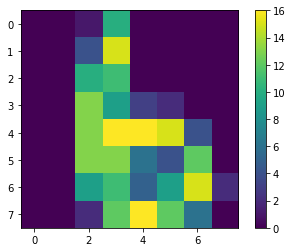

16.0

In [106]:
# 픽셀 값이 0~16 사이라는 것을 확인
plt.figure()
plt.imshow(X_train[0].reshape(8,8))
plt.colorbar()
plt.grid(False)
plt.show()
digits_data.max()

In [107]:
# 값의 범위를 0~1 사이로 조정
# 정규화
X_train = X_train / 16.0
X_test = X_test / 16.0
print(X_train.max(), X_train.min(), X_test.max(), X_test.min())

1.0 0.0 1.0 0.0


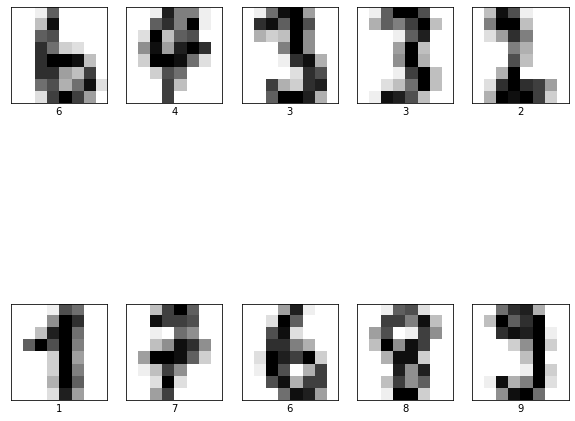

In [108]:
# 정규화가 정상적으로 되었는지 이미지 출력하기
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(8,8), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## 데이터 훈련 및 평가

## 의사결정나무(DecisionTree)

In [109]:
dt_model = DecisionTreeClassifier(random_state=15)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360

0.8444444444444444


array([[28,  0,  1,  0,  0,  0,  0,  0,  2,  0],
       [ 0, 31,  2,  2,  1,  0,  1,  0,  1,  0],
       [ 0,  0, 33,  1,  0,  1,  0,  0,  2,  1],
       [ 0,  1,  1, 20,  0,  1,  1,  0,  1,  2],
       [ 0,  0,  0,  1, 33,  0,  3,  2,  0,  2],
       [ 0,  0,  1,  0,  0, 33,  0,  1,  0,  0],
       [ 0,  1,  2,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  1],
       [ 0,  1,  3,  1,  0,  1,  0,  0, 27,  2],
       [ 0,  3,  2,  2,  0,  2,  0,  0,  1, 33]])

## 랜덤포레스트(RandomForest)

In [110]:
rt_model = RandomForestClassifier(random_state=15)
rt_model.fit(X_train, y_train)
y_pred = rt_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.97      0.97      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.95      0.98      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.99        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360

0.975
[[29  0  0  0  2  0  0  0  0  0]
 [ 0 37  0  0  0  1  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 1  0  0  0  0  0 37  0  0  0]
 [ 0

## svm

In [111]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

0.9833333333333333
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  0  1]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 38  

## SGDClassifier

In [112]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       1.00      0.97      0.99        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.95      1.00      0.98        41
           5       0.97      1.00      0.99        35
           6       1.00      1.00      1.00        38
           7       0.92      1.00      0.96        34
           8       0.88      1.00      0.93        35
           9       1.00      0.86      0.92        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

0.9666666666666667
[[29  0  0  0  2  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  1  0]
 [ 0  0 37  0  0  0  0  0  1  0]
 [ 0  0  0 25  0  1  0  0  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 38  

## Logistic Regression

In [113]:
lg_model = LogisticRegression(max_iter=2500) # ConvergenceWarning 때문에 max_iter 2500으로 설정
lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      0.97      0.96        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.94      0.94      0.94        35
           9       0.95      0.98      0.97        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

0.9777777777777777
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  1  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  0  1]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  1  0  0  0  0 37  

## 평가 지표 선택

참고자료 https://aihub.or.kr/aidata/133
손 글씨 활용분야  

- 금융권의 종이문서 디지털화, 이미지 문서 처리 등에 한글 및 문자 인식을 통해 서류나 문서를 자동분류하거나, 키워드 추출을 통해 업무처리를 자동화하는 RPA 분야의 핵심이 AI OCR이며, 이러한 문서처리, 한글 데이터(키워드)추출 등에 활용이 가능함.
- 시각장애우를 위해 이미지 문서, 이미지 내 한글을 인식 Text to Speech(TTS) 기능을 활용 음성 안내 서비스로도 활용이 가능 함

위에 활용분야를 생각했을 때 재현율이 중요하다고 생각됩니다. 그러므로 classification_report를 통해서 recall 점수를 평가 지표로 선택했습니다. 이 평가 지표를 통해서 모델을 평가하면 의사결정나무를 제외하고는 비슷한 결과가 나왔습니다.

# 와인 분류

## 데이터 가져오기

In [114]:
from sklearn.datasets import load_wine

wine = load_wine()

## 데이터 준비하기

In [115]:
wine_data = wine.data
wine_label = wine.target
print(wine.DESCR)
print(wine.target_names)
df_wine = pd.DataFrame(data = wine_data, columns = wine.feature_names)
df_wine.describe()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [116]:
# 결측치
df_wine[df_wine.isnull().any(axis = 1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


In [117]:
# 중복된 데이터 확인
df_wine[df_wine.duplicated()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


In [118]:
# 정규화
# 사이킷 런에 MinMaxScaler() 사용
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
wine_data_norm = mms.fit_transform(wine_data)

## train, test 데이터 분리

In [142]:
# 훈련 데이터, 테스트 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(wine_data_norm, wine_label, 
                                                    test_size = 0.2,
                                                   random_state = 30)


## 데이터 훈련 및 평가 

## 의사결정나무(DecisionTree)

In [143]:
dt_model = DecisionTreeClassifier(random_state = 15)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.81      0.81      0.81        16
           2       0.88      0.78      0.82         9

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.84        36
weighted avg       0.83      0.83      0.83        36

0.8333333333333334
[[10  1  0]
 [ 2 13  1]
 [ 0  2  7]]


## 랜덤포레스트(RandomForest)

In [144]:
rf_model = RandomForestClassifier(random_state = 15)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

0.9722222222222222
[[11  0  0]
 [ 1 15  0]
 [ 0  0  9]]


## svm

In [145]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

1.0
[[11  0  0]
 [ 0 16  0]
 [ 0  0  9]]


## SGDClassifier

In [146]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.96      0.95        36
weighted avg       0.95      0.94      0.94        36

0.9444444444444444
[[11  0  0]
 [ 2 14  0]
 [ 0  0  9]]


## Logistic Regression

In [147]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

0.9722222222222222
[[11  0  0]
 [ 1 15  0]
 [ 0  0  9]]


## 평가 지표 선택

와인 분류의 경우 어떠한 물품을 분류할 때는 정밀도가 중요고 생각되기 때문에 classification_report에서 precision 점수를 사용하여 판단해야 한다고 생각합니다. 이것을 기준으로 모델 중 가장 좋은 성능을 낸 것은 SVM이다. 하지만 훈련 데이터와 테스트 데이터를 나누는 과정에서 random_state를 변경하면 다른 모델들도 1.0이 나와 어떠한 모델이 와인 분류에 가장 적합한 모델인지는 알 수 없을 것 같습니다. 또한 데이터가 잘 정제되어 있어서 머신러닝을 돌렸을 때 전부 좋은 결과가 나온 것으로 판단됩니다.

# 유방암

In [125]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [126]:
bc_data = bc.data #feature
bc_label = bc.target #label
# 데이터 정보
print(bc.DESCR)
#Target Names
print(bc.target_names)
#데이터 Describe
df_bc = pd.DataFrame(data = bc_data, columns = bc.feature_names)
df_bc.describe()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [127]:
# 결측치 확인
df_bc[df_bc.isnull().any(axis=1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [128]:
# 중복값 확인
df_bc[df_bc.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [129]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_bc_norm = mms.fit_transform(df_bc)
df_bc_norm

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_bc_norm, bc_label, 
                                                    test_size = 0.2,
                                                   random_state = 15)
# X_train, X_test, y_train, y_test = train_test_split(df_bc, bc_label, 
#                                                     test_size = 0.2,
#                                                    random_state = 15)

## 의사결정나무(DecisionTree)

In [131]:
dt_model = DecisionTreeClassifier(random_state = 15)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

0.9473684210526315
[[34  5]
 [ 1 74]]


## 랜덤포레스트(RandomForest)

In [132]:
rf_model = RandomForestClassifier(random_state = 15)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

0.9298245614035088
[[33  6]
 [ 2 73]]


## svm

In [133]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        39
           1       0.95      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193
[[35  4]
 [ 1 74]]


## SGDClassifier

In [134]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        39
           1       0.89      1.00      0.94        75

    accuracy                           0.92       114
   macro avg       0.95      0.88      0.91       114
weighted avg       0.93      0.92      0.92       114

0.9210526315789473
[[30  9]
 [ 0 75]]


## Logistic Regression

In [135]:
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        39
           1       0.94      1.00      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193
[[34  5]
 [ 0 75]]


## 평가 지표 선택

암 환자 판정 모델의 경우 재현율이 중요하기 때문에 classification_report에서는 Recall 지표에 1과 recall이 만나는 점수를 보고 confusion_matrix를 이용하면 FN을 보고 판단해야 할 것 같습니다. 재현율이나 FN이 중요한 데이터는 실제 Positive 데이터를 Negative로 판단하면 업무상 큰 영향이 있는 경우인데 암 판단의 경우가 이런 경우이기 때문에 저 앞의 두 개의 평가 지표를 선택하여 판단하는 것이 좋다고 생각됩니다. 그리고 이 평가 지표를 이용하여 모델을 평가 했을 때 Logistic Regression이 여기서 가장 좋은 모델로 판단됩니다.

참고자료    
https://ysyblog.tistory.com/72  
https://www.tensorflow.org/tutorials/keras/classification

# 회고

### 이번 프로젝트를 통해서 얻어가는 점

- 전처리와 평가 지표에 대해서 많은 생각을 할 수 있었습니다.
- 지금까지는 모델의 정확도를 가장 중요하게 생각했지만 앞으로는 이 모델을 어떻게 사용해야 할지에 따라 평가 지표가 달라지고 그것을 통해서 모델의 성능을 올릴지 고민을 할 수 있을 것 같습니다.
- 정규화를 했을 때와 하지 않았을 때 와인 분류를 제외하고는 조금의 모델의 성능 향상이 있어서 정규화의 중요성을 알 수 있었습니다. 
- 다양한 scikit-learn 모델들의 사용법을 알게 되었습니다.

### 어려웠던 점

- 아직 데이터 전처리가 미숙하여 전처리하는 것이 어려웠습니다.
- 와인 분류나 암 환자 같은 경우는 평가 지표를 쉽게 선택하였지만 손 글씨 같은 경우에는 어떤 평가 지표를 선택할지에 대해서 고르는 것이 어려웠습니다.

### 추가로 공부할 점

- 전처리 중 이상치 처리에 대해 많이 부족한 것을 알게 되어서 이것에 대해서 추가로 공부가 필요하다고 생각됩니다.
- 평가 지표를 이용하여 원하는 평가 지표를 향상 시킬 방법에 대해서 공부가 필요하다고 느끼게 되었습니다.